In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [47]:
df = pd.read_csv("experiment_dataset.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [49]:
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


<Axes: ylabel='Time Spent'>

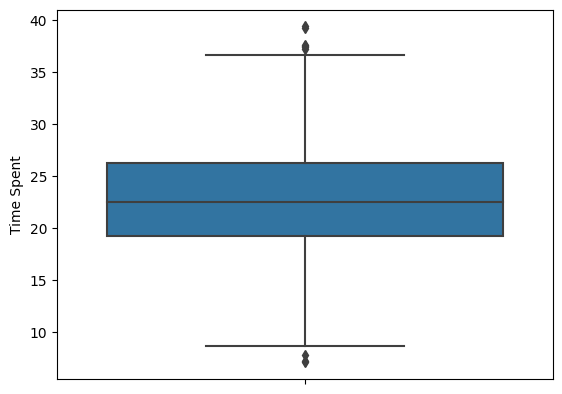

In [50]:
sns.boxplot(df, y="Time Spent")

<Axes: ylabel='CTR'>

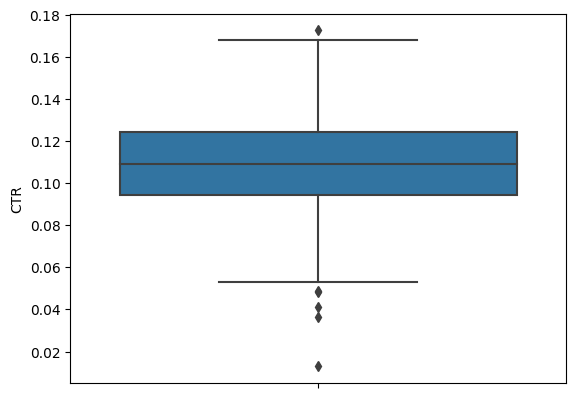

In [51]:
sns.boxplot(df, y = 'CTR')

In [52]:
df = df[df['Time Spent']<36] #Remove outliers to reduce variance 
df = df[df['Time Spent']>10]
df = df[df['CTR']<0.16]
df = df[df['CTR']>0.06]


Check the data to see if it is normally distributed or not and is compatible with running parametric or non-parameric tests. The hisplots show that data is normally distributed and it is continuous so t-test can be used

<Axes: xlabel='Time Spent', ylabel='Count'>

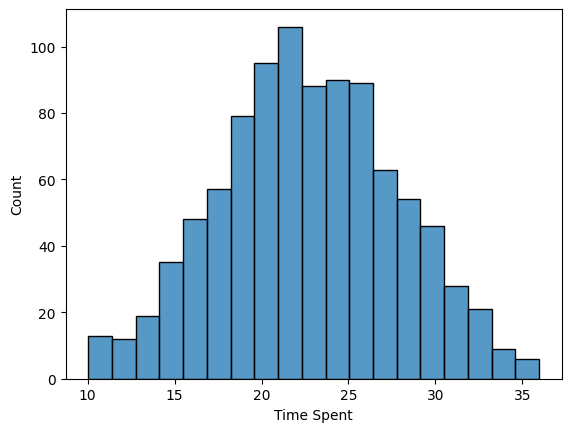

In [53]:
sns.histplot(data = df, x = 'Time Spent')


<Axes: xlabel='CTR', ylabel='Count'>

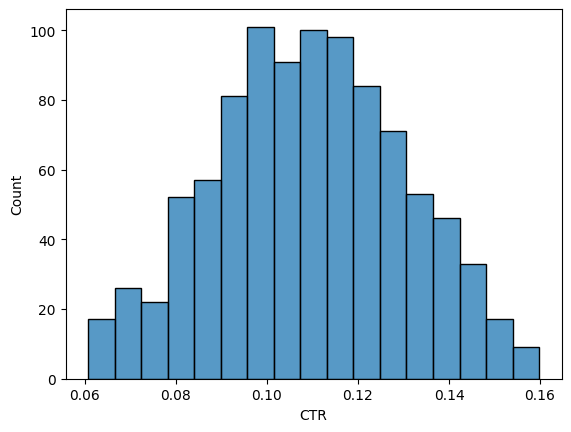

In [54]:
sns.histplot(data = df, x = 'CTR')

Check to see if there is any statistical difference in the behavior or users with different devices and  locations using ANOVA

In [55]:
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.0029346435229116188, pvalue=0.997069667325687)


In [56]:
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.21289234928151954, pvalue=0.8082814882486558)


In [57]:
loc_1 = df[df['Device'] == 'Device1']['Time Spent']
loc_2 = df[df['Device'] == 'Device2']['Time Spent']
loc_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.18868706197392746, pvalue=0.828076455445212)


In [58]:
loc_1 = df[df['Device'] == 'Device1']['CTR']
loc_2 = df[df['Device'] == 'Device2']['CTR']
loc_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.4033989158458418, pvalue=0.6681593318644926)


The overall bahavior of the population is the similar but the device type shows that there is an impact of devices on CTR even though p value is above 0.5 so change in behavior cannot be comfortably attributed completely to the experiment.

We now check the sifgnificance between Variants, Time Spent and CTR

In [59]:
var_a_ts = df[df['Variant']=='Variant A']['Time Spent']
var_b_ts = df[df['Variant']=='Variant B']['Time Spent']
control_ts = df[df['Variant']=='Control']['Time Spent']

p_val = stats.f_oneway(var_a_ts, var_b_ts, control_ts)
print(p_val)

F_onewayResult(statistic=66.3371230006119, pvalue=1.0553858028041178e-27)


In [60]:
var_a_ctr = df[df['Variant']=='Variant A']['CTR']
var_b_ctr = df[df['Variant']=='Variant B']['CTR']
control_ctr = df[df['Variant']=='Control']['CTR']

p_val = stats.f_oneway(var_a_ctr, var_b_ctr, control_ctr)
print(p_val)

F_onewayResult(statistic=86.18980201748246, pvalue=3.873486732963824e-35)


There is significant difference between the variants and the control group in both CTR and Time Spent.

We then check the independant t-test on each variant & control and on both variants to see their interrelationship

In [61]:

p_val = stats.ttest_ind(var_a_ts, control_ts) # Variant A time spent and control time spent
p_val_2 = stats.ttest_ind(var_b_ts, control_ts) #variant B time spent and control time spent
p_val_3 = stats.ttest_ind(var_b_ts, var_a_ts) # Variant A and B Time Spent
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=11.545480792941055, pvalue=3.9354638478147277e-28)
Ttest_indResult(statistic=7.281316277746865, pvalue=9.769153593038383e-13)
Ttest_indResult(statistic=-3.9641644159825375, pvalue=8.202184160515784e-05)


In [62]:

p_val = stats.ttest_ind(var_a_ctr, control_ctr)  # Variant A and control CTR
p_val_2 = stats.ttest_ind(var_b_ctr, control_ctr) # Variant B and control CTR
p_val_3 = stats.ttest_ind(var_b_ctr, var_a_ctr) # Variant A and B CTR
print(p_val)
print(p_val_2)
print(p_val_3)

Ttest_indResult(statistic=13.403075075104613, pvalue=2.8998225067278826e-36)
Ttest_indResult(statistic=6.098424356421871, pvalue=1.85629513780506e-09)
Ttest_indResult(statistic=-6.87888188411589, pvalue=1.4480384354940175e-11)


This test shows that both variants are different from eachother and the control group in terms of Time Spent. 
Both variants are different from eachother and the control in case of CTR. 
Variant A is more statistically significant than B in both cases

To recheck:

In [63]:
df.groupby('Variant')[['Time Spent']].mean()

,Time Spent
Variant,
Control,20.364867
Variant A,24.663873
Variant B,23.150929


In [64]:
df.groupby('Variant')[['CTR']].mean()

,CTR
Variant,
Control,0.099477
Variant A,0.119437
Variant B,0.108801


Both perform better than control but Variant A performs slightly better.

Now lets check for increase or lift in the CTR and Time Spent to see which Variant has more impact. we do this by subtracting Control CTR and Time Spent  and variant CTR and Time Spent

In [84]:
df_variants = df[df['Variant'] != 'Control']
df_control = df[df['Variant']=='Control']


In [67]:
df_lift = pd.merge(df_variants , df_control, on = ['Location', 'Device', 'Age'])
df_lift


,Unnamed: 0_x,Age,Location,Device,Variant_x,Time Spent_x,CTR_x,Unnamed: 0_y,Variant_y,Time Spent_y,CTR_y
0,1,18,Location1,Device1,Variant B,11.310518,0.096859,337,Control,19.518644,0.080622
1,1,18,Location1,Device1,Variant B,11.310518,0.096859,934,Control,21.843412,0.098122
2,72,18,Location1,Device1,Variant B,25.032693,0.090995,337,Control,19.518644,0.080622
3,72,18,Location1,Device1,Variant B,25.032693,0.090995,934,Control,21.843412,0.098122
4,97,18,Location1,Device1,Variant A,25.877184,0.120051,337,Control,19.518644,0.080622
...,...,...,...,...,...,...,...,...,...,...,...
446,953,29,Location2,Device3,Variant B,28.002956,0.109604,876,Control,22.179099,0.121366
447,954,29,Location1,Device2,Variant B,23.398638,0.095622,168,Control,16.438495,0.119084
448,960,54,Location1,Device1,Variant A,27.999778,0.134440,438,Control,17.564954,0.143736
449,983,48,Location2,Device1,Variant A,28.171759,0.144396,873,Control,20.290904,0.110290


In [68]:
df_lift['Time Spent Lift'] =  df_lift['Time Spent_x']-df_lift['Time Spent_y']
df_lift['CTR Lift'] =  df_lift['CTR_x']-df_lift['CTR_y']
df_lift

,Unnamed: 0_x,Age,Location,Device,Variant_x,Time Spent_x,CTR_x,Unnamed: 0_y,Variant_y,Time Spent_y,CTR_y,Time Spent Lift,CTR Lift
0,1,18,Location1,Device1,Variant B,11.310518,0.096859,337,Control,19.518644,0.080622,-8.208126,0.016237
1,1,18,Location1,Device1,Variant B,11.310518,0.096859,934,Control,21.843412,0.098122,-10.532894,-0.001264
2,72,18,Location1,Device1,Variant B,25.032693,0.090995,337,Control,19.518644,0.080622,5.514049,0.010373
3,72,18,Location1,Device1,Variant B,25.032693,0.090995,934,Control,21.843412,0.098122,3.189281,-0.007127
4,97,18,Location1,Device1,Variant A,25.877184,0.120051,337,Control,19.518644,0.080622,6.358540,0.039430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,953,29,Location2,Device3,Variant B,28.002956,0.109604,876,Control,22.179099,0.121366,5.823857,-0.011762
447,954,29,Location1,Device2,Variant B,23.398638,0.095622,168,Control,16.438495,0.119084,6.960143,-0.023462
448,960,54,Location1,Device1,Variant A,27.999778,0.134440,438,Control,17.564954,0.143736,10.434824,-0.009296
449,983,48,Location2,Device1,Variant A,28.171759,0.144396,873,Control,20.290904,0.110290,7.880854,0.034106


In [69]:
df_lift = df_lift.drop(['Unnamed: 0_y'], axis=1) 

In [70]:
df_lift

,Unnamed: 0_x,Age,Location,Device,Variant_x,Time Spent_x,CTR_x,Variant_y,Time Spent_y,CTR_y,Time Spent Lift,CTR Lift
0,1,18,Location1,Device1,Variant B,11.310518,0.096859,Control,19.518644,0.080622,-8.208126,0.016237
1,1,18,Location1,Device1,Variant B,11.310518,0.096859,Control,21.843412,0.098122,-10.532894,-0.001264
2,72,18,Location1,Device1,Variant B,25.032693,0.090995,Control,19.518644,0.080622,5.514049,0.010373
3,72,18,Location1,Device1,Variant B,25.032693,0.090995,Control,21.843412,0.098122,3.189281,-0.007127
4,97,18,Location1,Device1,Variant A,25.877184,0.120051,Control,19.518644,0.080622,6.358540,0.039430
...,...,...,...,...,...,...,...,...,...,...,...,...
446,953,29,Location2,Device3,Variant B,28.002956,0.109604,Control,22.179099,0.121366,5.823857,-0.011762
447,954,29,Location1,Device2,Variant B,23.398638,0.095622,Control,16.438495,0.119084,6.960143,-0.023462
448,960,54,Location1,Device1,Variant A,27.999778,0.134440,Control,17.564954,0.143736,10.434824,-0.009296
449,983,48,Location2,Device1,Variant A,28.171759,0.144396,Control,20.290904,0.110290,7.880854,0.034106


<Axes: xlabel='Variant_x'>

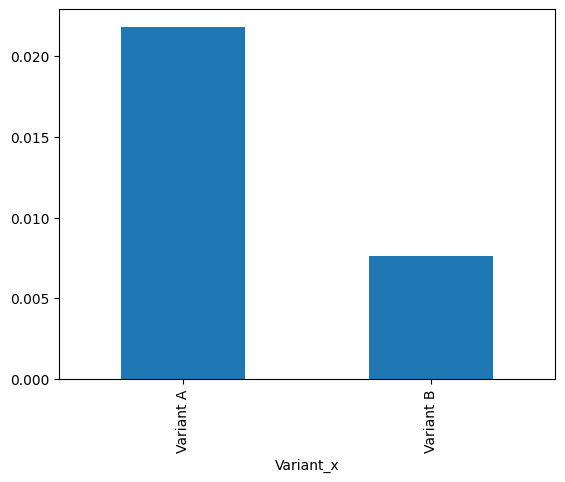

In [72]:
df_lift.groupby('Variant_x')['CTR Lift'].mean().plot(kind='bar')

The average CTR lift for Variant 1 is higher than Variant B. The traget audience is interacting with more parts of Variant A as compared with Variant B

<Axes: xlabel='Variant_x'>

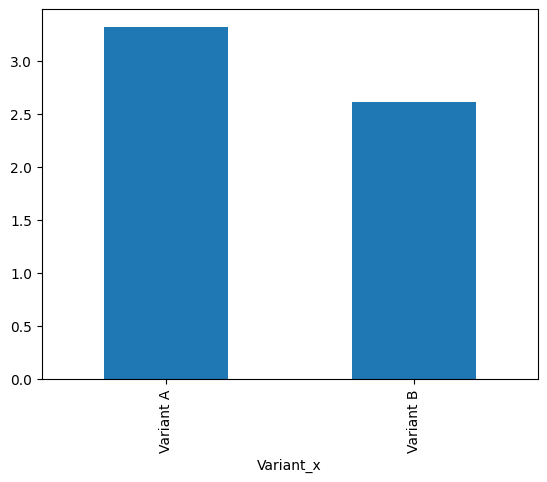

In [73]:
df_lift.groupby('Variant_x')['Time Spent Lift'].mean().plot(kind='bar')

The average time spent on Variant A is more than that on Variant B but with a small difference. User are spending majority of their time interacting with select/few parts of Variant B while users are spending more time in interacting with more parts in Variant A

We will compare the Time Spent/Time Spent Lifts and CTR/CTR Lifts of both variants with each other to see if they are statistically different 
We will then compare the Time Spent and CTR of both variants with those of the control group

In [74]:
var_a_tsl = df_lift[df_lift['Variant_x'] =='Variant A']['Time Spent Lift'] #variable A Time Spent Lift
var_a_ctrl = df_lift[df_lift['Variant_x'] =='Variant A']['CTR Lift'] #variable A CTR Lift
var_b_tsl = df_lift[df_lift['Variant_x'] =='Variant B']['Time Spent Lift'] #variable B Time Spent Lift
var_b_ctrl = df_lift[df_lift['Variant_x'] =='Variant B']['CTR Lift'] #variable B CTR Lift


In [75]:
t_stat, p_val = stats.ttest_ind(var_a_tsl, var_b_tsl) # Varinat A and B Time Spent Lift

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 1.102270810718838
P-value: 0.2709344370536418


based on testing Time Spent and Time Spent Lift we cannot reject the null hypothesis that both variant a and variant b are the same

In [76]:
t_stat, p_val = stats.ttest_ind(var_a_ctrl, var_b_ctrl) #Variant A and B CTR lift

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 5.413220082437998
P-value: 1.0098577689308827e-07


based on CTR Lift we reject the null hypothesis that both variant a and variant b are the same. As CTR is significant we look at further analysis through visualizations

<Axes: xlabel='Device', ylabel='CTR Lift'>

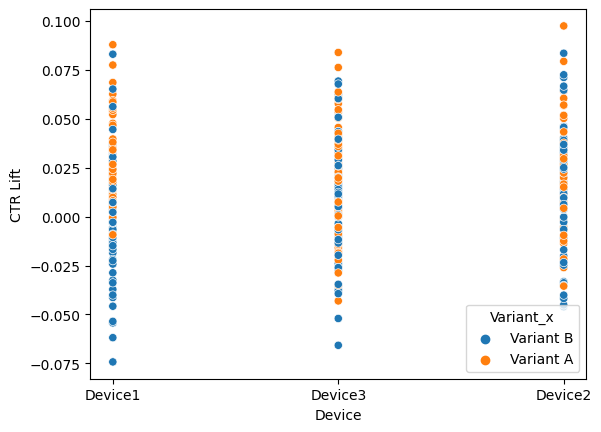

In [77]:
sns.scatterplot(data=df_lift, x="Device", y="CTR Lift", hue= "Variant_x" )

<Axes: xlabel='Location', ylabel='CTR Lift'>

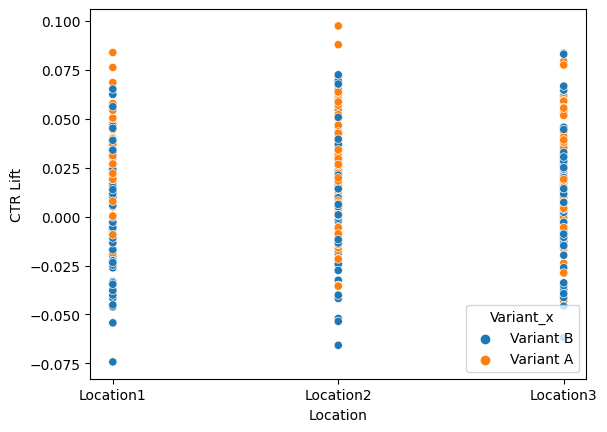

In [78]:
sns.scatterplot(data=df_lift, x="Location", y="CTR Lift", hue= "Variant_x" )

<Axes: xlabel='Age'>

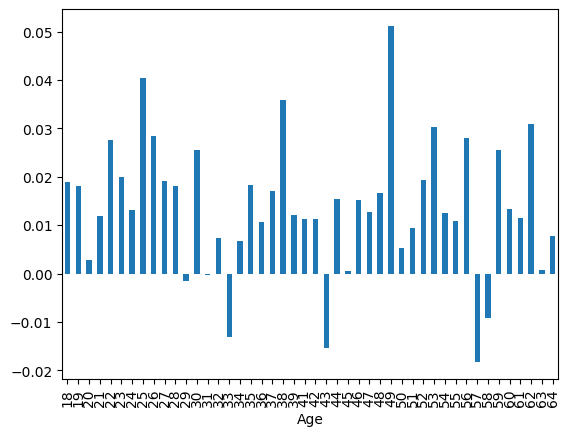

In [79]:
df_lift.groupby('Age')['CTR Lift'].mean().plot(kind='bar')

#3

The analysis shows that user charactertistics (location and device) are significantly different from each other in terms of Time Spent and CTR.

Variant A, B and Control are all significantly different from each other in terms of Time Spent and CTR

Variant A shows a lower p value than Varaint B in these cases

Variant A and B were tested for impact through Time Spent Lift and CTR Lift analysis. There is no significant difference in lift for Time spent for Variant A and B so it will have similar impact in case of deployment of either variant. CTR Lift shows significant difference with Varaint A showing lower p value meaning that A has a higher probability of change.

The recommendation to the engineering team is to deploy Variant A as a permenant feature.



#4

Variant A shows improvment in both CTR and Time Spent so users are spending more time on the feature and are also trying to understand the feature, this is also true for Variant B but at comparatively less impact. However, these two factors are key features of all newly introduced feature. Users try and play around with new features and there is a high chance that after afew weeks these features fall from use.
To make sure that the recommended Variant A adds long term value it should not be deployed for all users as a permenant feature. It can be deployed as a longer term experiment where feedback can be collected from users. The experiment should run long enough to get a good sample of feedback and should be stopped early to avoid unplanned backlash. The feedback can be incorporated into the feature if possible and the improved Variant A can be deployed as a permanent feature. 
